# Example 5.5

Simulation of a continuous-space Markov chain and plotting its stationary measure.

Let us connect this example to Example 5.4 where we simulated the chain. We can now test after some burn-in steps, the chain will sample from its stationary measure as given in Example 5.5

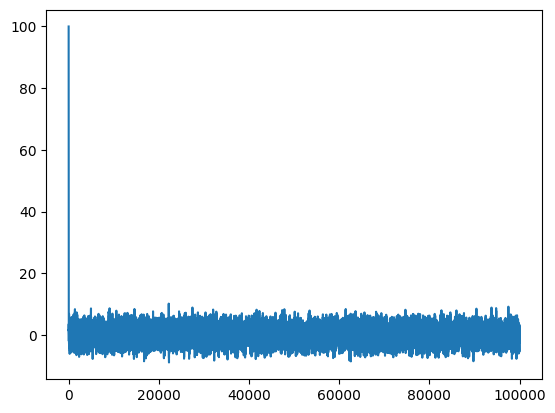

In [14]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(15)

# Note our system x_n = a x_{n-1} + noise
T = 100000
x = np.zeros(T)

x[0] = 100
a = 0.9

for t in range(1,T):
    x[t] = a * x[t-1] + rng.normal(0,1)

plt.plot(x)
plt.show()

We can see that we can set burnin steps to $200$ and treat the samples as independent from that point on. We also need to plot our density
\begin{align*}
p_\star(x) = \mathcal{N}\left(x; 0, \frac{1}{1- a^2}\right)
\end{align*}

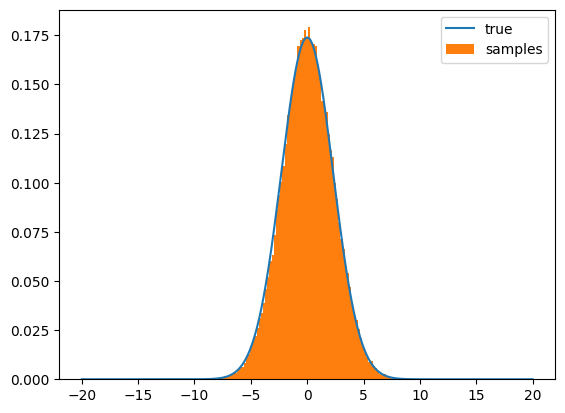

In [15]:
def p(x, a):
    sig = np.sqrt(1 / (1 - a**2))
    return np.exp(-x**2 / (2 * sig**2)) / (np.sqrt(2 * np.pi) * sig)

burnin = 1000
# take samples after burnin
x_samples = x[burnin:]

# plot the density and histogram
xx = np.linspace(-20, 20, 1000)
plt.plot(xx, p(xx, a), label='true')
plt.hist(x_samples, density=True, bins=100, label='samples')
plt.legend()
plt.show()

As can be seen from here, we kept the samples after $200$ steps and plotted their histogram against the target density $p_\star(x)$, which confirms that samples behave as if they are i.i.d samples from $p_\star$ which means that the chain is at _stationarity_.